In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("train.csv")
# if dataset has nan values then fill it with mean of that column
df = df.fillna(df.mean())

In [13]:
df.head(5)

,open,high,low,close,return,volatility,volume,prev volume,next month return sign
0,1,1.025595,1.000000,1.018723,0.036807,0.086790,4398500,4009100.0,1
1,1,1.066588,1.000000,1.066572,0.076164,0.141086,12077600,13004600.0,0
2,1,1.044670,0.972615,0.972615,-0.024128,0.162615,13119900,12077600.0,1
3,1,1.089809,1.000000,1.089809,0.094817,0.145533,3840600,4485900.0,0
4,1,1.032791,0.970420,0.995200,0.012631,0.199212,9886800,14313900.0,0


In [14]:
# make a column diff_high_low which is the difference between high and low
df['diff_high_low'] = df['high'] - df['low']
df['diff_open_close'] = df['open'] - df['close']
df['ratio_currvol_prevvol']=df['volume']/df['prev volume']
df['ratio_diffhighclose_difflowclsoe']=(df['high']-df['close'])/(df['low']-df['close'])
df['ratio_diffhighclose_difflowclsoe'].replace(np.inf, np.nan, inplace=True)
df['ratio_diffhighclose_difflowclsoe'].replace(-np.inf, np.nan, inplace=True)
df['ratio_diffhighclose_difflowclsoe'].fillna(df['ratio_diffhighclose_difflowclsoe'].median(), inplace=True)

# df['diff_high_close'].fillna(df['diff_high_close'].mean(), inplace=True)
# drop columns high , low , open , close , volume , prev volume
df.drop(['high','low','open','close','volume','prev volume'],axis=1,inplace=True)
df.head(70)

,return,volatility,next month return sign,diff_high_low,diff_open_close,ratio_currvol_prevvol,ratio_diffhighclose_difflowclsoe
0,0.036807,0.086790,1,0.025595,-0.018723,1.097129,-0.367038
1,0.076164,0.141086,0,0.066588,-0.066572,0.928718,-0.000229
2,-0.024128,0.162615,1,0.072055,0.027385,1.086300,-0.367038
3,0.094817,0.145533,0,0.089809,-0.089809,0.856149,-0.000000
4,0.012631,0.199212,0,0.062371,0.004800,0.690713,-1.516948
...,...,...,...,...,...,...,...
65,0.040757,0.197760,0,0.098465,-0.051716,1.416256,-0.020917
66,0.035221,0.142293,0,0.037116,-0.024178,1.020857,-0.441754
67,-0.051806,0.112072,0,0.050984,0.050984,0.514395,-0.367038
68,0.002049,0.125006,0,0.043300,0.001075,1.063018,-0.025453


<AxesSubplot:>

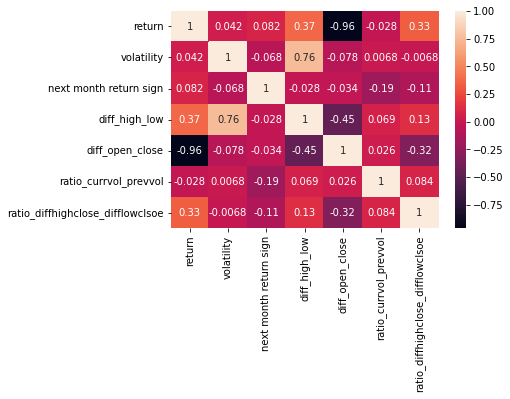

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [16]:
X=df[['ratio_diffhighclose_difflowclsoe','return','volatility','diff_high_low','diff_open_close','ratio_currvol_prevvol']]
y=df['next month return sign']
# X = scaler.fit_transform(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
rf = RandomForestClassifier()
# rf.fit(X, y)
X_train.fillna(X_train.mean(), inplace=True)
rf.fit(X_train, y_train)

b:\Downloads\2023\nqc\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


RandomForestClassifier()

In [21]:
print(X_test)
y_pred = rf.predict(X_test)

    ratio_diffhighclose_difflowclsoe    return  volatility  diff_high_low  \
21                         -0.175406  0.046416    0.079333       0.065906   
55                         -0.000000  0.017417    0.107479       0.027945   
60                         -5.200580 -0.010363    0.054872       0.019119   
47                        -16.212219 -0.033879    0.130583       0.043714   
59                         -0.409135  0.015082    0.132597       0.049308   
67                         -0.367038 -0.051806    0.112072       0.050984   
10                         -0.616614 -0.015827    0.119548       0.040853   
20                         -0.230376  0.000135    0.101972       0.035104   
8                          -1.360021 -0.047641    0.184294       0.080817   
38                         -1.007498  0.009064    0.069355       0.018902   
31                         -0.000000  0.084487    0.123126       0.089271   
12                         -0.000000  0.043712    0.163693       0.076274   

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[6 3]
 [4 8]]


In [27]:
# read test file
test_df = pd.read_csv("test.csv")
# if dataset has nan values then fill it with mean of that column
test_df = test_df.fillna(test_df.mean())

# make same transformations on test data
test_df['diff_high_low'] = test_df['high'] - test_df['low']
test_df['diff_open_close'] = test_df['open'] - test_df['close']
test_df['ratio_currvol_prevvol']=test_df['volume']/test_df['prev volume']
test_df['ratio_diffhighclose_difflowclsoe']=(test_df['high']-test_df['close'])/(test_df['low']-test_df['close'])
test_df['ratio_diffhighclose_difflowclsoe'].replace(np.inf, np.nan, inplace=True)
test_df['ratio_diffhighclose_difflowclsoe'].replace(-np.inf, np.nan, inplace=True)
test_df['ratio_diffhighclose_difflowclsoe'].fillna(test_df['ratio_diffhighclose_difflowclsoe'].median(), inplace=True)


# drop columns high , low , open , close , volume , prev volume
test_df.drop(['high','low','open','close','volume','prev volume'],axis=1,inplace=True)

# make same transformations on test data
test_df=test_df[['ratio_diffhighclose_difflowclsoe','return','volatility','diff_high_low','diff_open_close','ratio_currvol_prevvol']]
# make predictions on test data
# test_df=scaler.fit_transform(test_df)
test_predictions = rf.predict(test_df)
# save predictions in a csv file
final_predictions = pd.DataFrame(test_predictions)
final_predictions.to_csv("predictions.csv",index=False,header=False)
print(test_df)

    ratio_diffhighclose_difflowclsoe    return  volatility  diff_high_low  \
0                          -6.896929 -0.012715    0.100676       0.041842   
1                          -0.794246 -0.048085    0.185009       0.066035   
2                          -0.202956  0.063034    0.188616       0.101275   
3                          -0.084594 -0.001250    0.203302       0.054342   
4                          -0.306493 -0.007479    0.169189       0.033543   
5                          -2.082490 -0.010216    0.092743       0.032034   
6                          -1.457747  0.035461    0.152645       0.048533   
7                          -0.000000  0.083783    0.090953       0.078504   
8                          -1.998700  0.015075    0.112085       0.043335   
9                          -1.230623  0.002962    0.090177       0.018629   
10                         -6.843566 -0.000741    0.112201       0.024624   
11                         -2.739797 -0.237518    0.787565       0.331728   